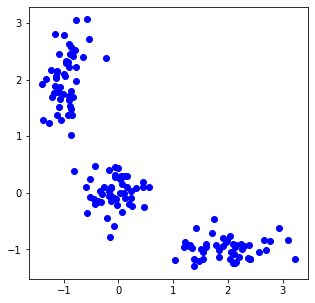

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.zeros((150, 2))
np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)
X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo');

# 自己实现

In [2]:
from scipy.spatial.distance import cdist
from matplotlib.animation import FuncAnimation


class KMeans:
    def __init__(self, data, n_clusters, max_iters=10, 
                 init='random', random_state=None, 
                 figsize=(5, 5), legend=True, interval=1000):
        assert data.shape[1] == 2
        self.data = data
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        if random_state is not None:
            np.random.seed(seed=random_state)
        shape = (n_clusters, 2)
        if init == 'random':
            # Randomly allocate the centroids
            self.centroids = np.random.normal(size=shape)
        elif isinstance(init, np.ndarray) and init.shape == shape:
            self.centroids = init
        else:  # todo
            pass
        self.legend = legend
        self.interval = interval
        
        # markers = 's^ov<>'
        # if n_clusters <= len(markers):
        #     self.markers = markers
        # else:
        #     self.markers = 'o' * n_clusters
        self.markers = 'o' * n_clusters
        #
        colors = ['#1f77b4', '#ff7f0e', '#3ca02c', '#9467bd', '#8c564b', 
                  '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#d62728']
        if n_clusters < len(colors):
            self.colors = colors
        else:  # todo 颜色不够用怎么办
            pass
            
        self.fig, self.ax = plt.subplots(figsize=figsize)
    
    def setup(self):
        tmp = []
        tmp.append(self.ax.scatter(self.data[:, 0], self.data[:, 1], c=self.colors[0], marker='o'));
        tmp.append(
            self.ax.scatter(self.centroids[:, 0], self.centroids[:, 1], c=self.colors[-1], marker='x', s=70)
        )
        self.ax.set_title('KMeans Initial')
        return tuple(tmp)
    
    def update(self, i):
        plt.cla()  # 清除当前figure中活动的axes，其他axes保持不变
        labels = cdist(self.data, self.centroids).argmin(axis=1)
        
        tmp = []
        for label in range(self.n_clusters):
            part_data = self.data[labels == label, :]
            tmp.append(
                self.ax.scatter(part_data[:, 0], part_data[:, 1], 
                                c=self.colors[label], marker=self.markers[label], label=f'#{label}')
            )
            self.centroids[label, :] = part_data.mean(axis=0)
        tmp.append(
            self.ax.scatter(self.centroids[:, 0], self.centroids[:, 1], c=self.colors[-1], marker='x', s=70)
        )
        if self.legend:
            self.ax.legend(loc=0)
        self.ax.set_title(f"KMeans Iteration {i + 1}")
        return tuple(tmp)
        
    def show(self):
        global anim
        anim = FuncAnimation(fig=self.fig, func=self.update, init_func=self.setup, 
                             frames=np.arange(self.max_iters), 
                             interval=self.interval, repeat=False, blit=False)
        plt.show()

<IPython.core.display.Javascript object>


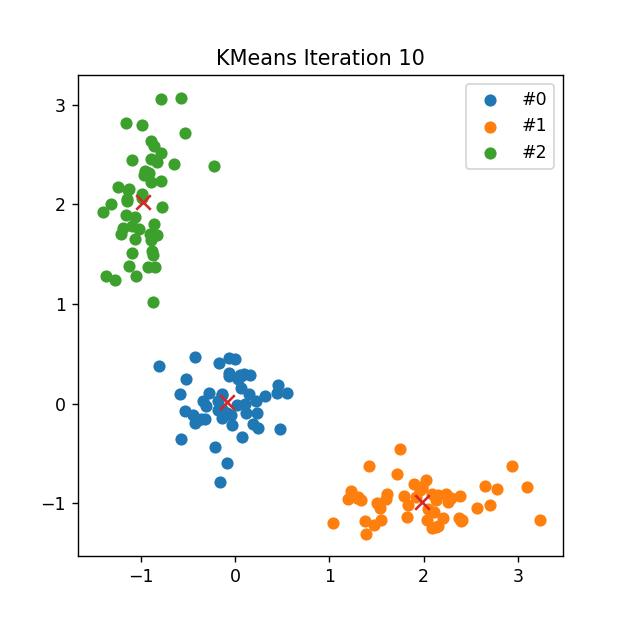

In [3]:
%matplotlib notebook

kmeans = KMeans(X, 3)
kmeans.show()

# `pyclustering`中的实现

In [4]:
from pyclustering.cluster.kmeans import kmeans, kmeans_observer, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

initial_centers = kmeans_plusplus_initializer(X, 3).initialize()
observer=kmeans_observer()
km = kmeans(X, initial_centers, observer=observer).process()

<IPython.core.display.Javascript object>


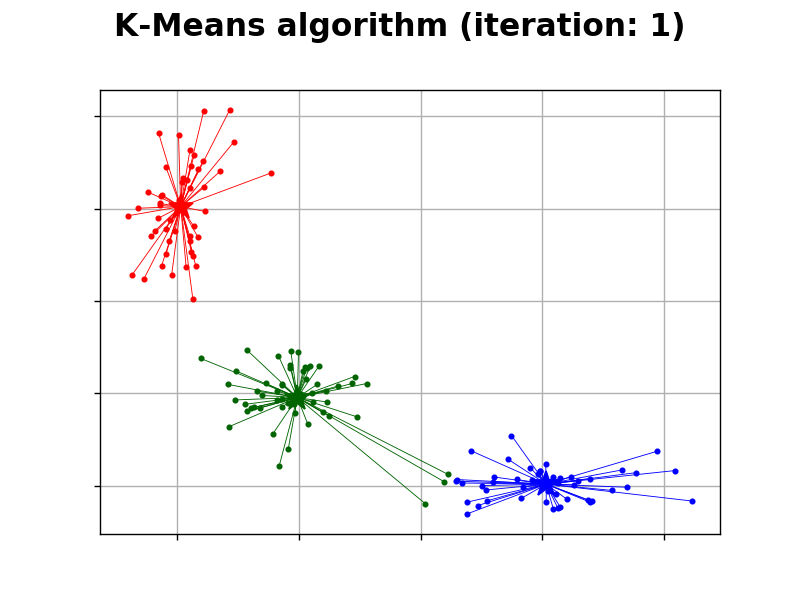

In [6]:
%matplotlib notebook

kmeans_visualizer().animate_cluster_allocation(X, observer, animation_velocity=1000, save_movie='try.mp4')

# 总结
`matplotlib.animation.FuncAnimation`有些问题，必须要以变量接收其返回值且声明其为全局变量，才能在notebook中正常播放动画，而且在jupyter lab中总是无法显示。

自行更改了包`pyclustering`中的源代码。